In [11]:

import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('insurance.csv')


Michael Woodburn: I'm seeking to explore and improve upon the work done by the great Dandelion https://www.kaggle.com/hely333/eda-regression/notebook in her analysis of insurance costs.

Dandelion:
Today we will explore a data set dedicated to the cost of treatment of different patients.  The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis.
In any case, I wish you to be healthy!


In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

A good day is when there is no "NaN"in the data :D
Let's look at our data to understand something about it.
Since we are primarily interested in the amount of costs see what posts are more correlated with charges. For a start, we will encode categorical features.


In [14]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 

LabelEncoder()

In [15]:
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)

In [17]:
#region
#le.fit(data.region.drop_duplicates()) 
#data.region = le.transform(data.region)
"""A few words about coding "region". In general, categorical variables with large variability are best encoded using OneHotEncoder and so on.  
But in this case, nothing will change, because there is no special order in which the regions would be listed. So I'm being very lazy only used the Label Encoder."" - Dandelion """



'A few words about coding "region". In general, categorical variables with large variability are best encoded using OneHotEncoder and so on.  \nBut in this case, nothing will change, because there is no special order in which the regions would be listed. So I\'m being very lazy only used the Label Encoder."" - Dandelion '

I think it's reasonable to one-hot-encode the regions.

In [23]:
r_dummies = pd.get_dummies(data.region)
len(r_dummies)


1338

In [28]:
data_encoded = pd.concat((data,r_dummies),axis=1)

In [30]:
data = data_encoded

In [31]:
data.corr()['charges'].sort_values()

southwest   -0.043210
northwest   -0.039905
northeast    0.006349
sex          0.057292
children     0.067998
southeast    0.073982
bmi          0.198341
age          0.299008
smoker       0.787251
charges      1.000000
Name: charges, dtype: float64

In [32]:
data.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


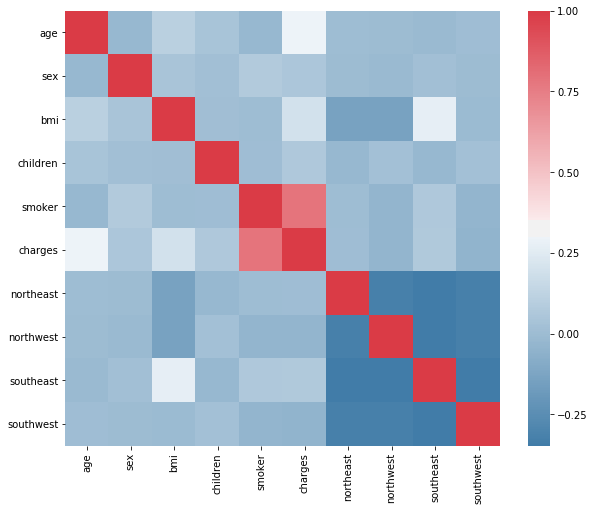

In [33]:

f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

A strong correlation is observed only with the fact of smoking the patient.  To be honest, I expected a higher correlation with bmi.  Well. We investigate smoking in more detail. - Dandelion

MW: This is consistent with the weakness of BMI as an indicator of health expenditure. I wonder if Waist-Hip-Ratio will do any better? To be honest, I'm also surprised that smoking has such a high correlation, because colloquially (around the hospital) 
people seem to be under the impression that smokers save the health system money by dying sooner. I'm also bearing in mind that this data is simulated so may not reflect my experiences.

Note also the very weak correlatiom between regions and charges.

Dandelion: First, let's look at the distribution of charges. This will help us to know how much patients spend on treatment on average.
We're importing another useful library that we'll need a few more times. Although it's not necessary, why not :D

In [40]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
p = figure(title="Distribution of charges",tools="save",
            background_fill_color="#E8DDCB")
hist, edges = np.histogram(data.charges)
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
show(gridplot(p, plot_width=400, plot_height=400, toolbar_location=None))

Loading BokehJS ...

TypeError: 'Figure' object is not iterable

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

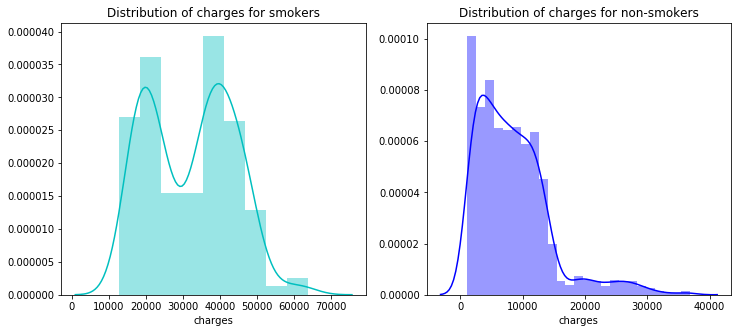

In [41]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Smoking patients spend more on treatment. But there is a feeling that the number of non-smoking patients is greater. Going to check it.

MW: I love the use of sns.distplot here. plt.hist functions have always bothered me because of difficulty in choosing bins. It's also great to have a line showing the general trend.

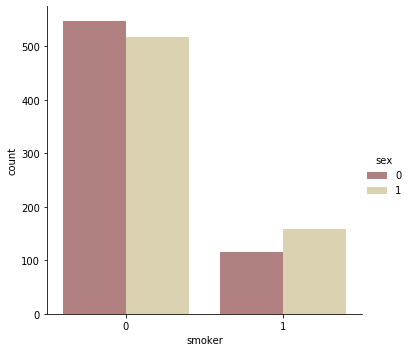

In [42]:

sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

Please note that women are coded with the symbol " 1 "and men - "0". Thus non-smoking people and the truth more. 
Also we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking. Maybe we'll check it out later.
And some more useful visualizations. 

MW: Very interesting. Catplots in sns seems to be really flexible. I'm a big fan of throwing 'hue' at this too.


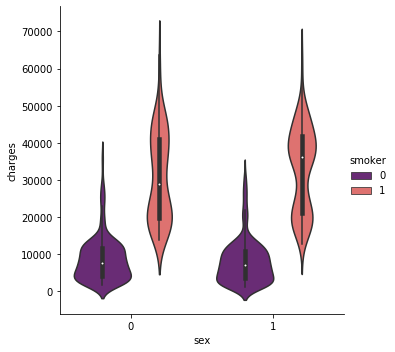

In [43]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data, palette = 'magma')

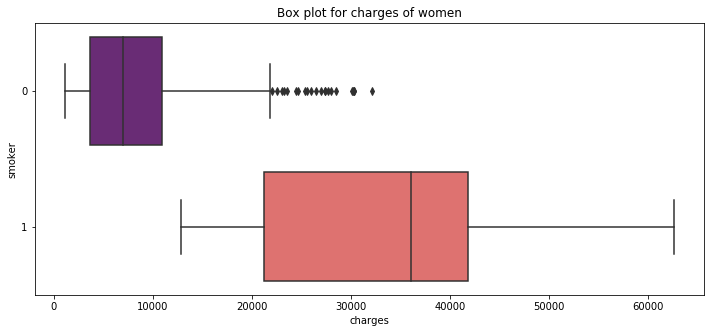

In [44]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

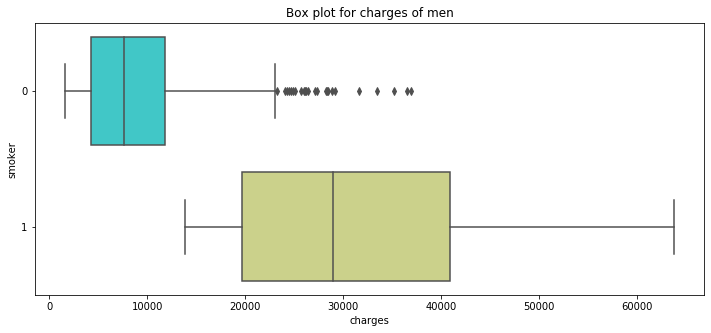

In [45]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

Now let's pay attention to the age of the patients.  First, let's look at how age affects the cost of treatment, and also look at patients of what age more in our data set.

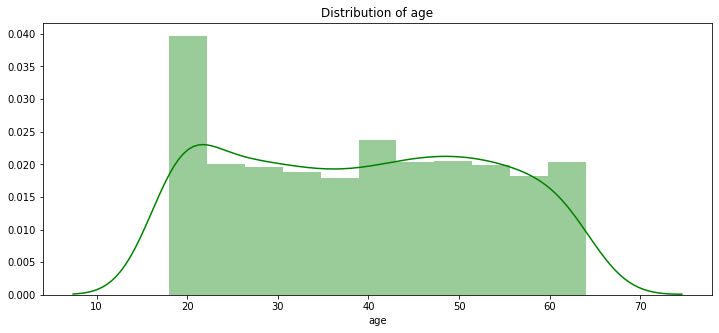

In [46]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

We have patients under 20 in our data set. Im 18 years old. This is the minimum age of patients in our set. The maximum age is 64 years. 
My personal interest is whether there are smokers among patients 18 years.

Text(0.5, 1, 'The number of smokers and non-smokers (18 years old)')

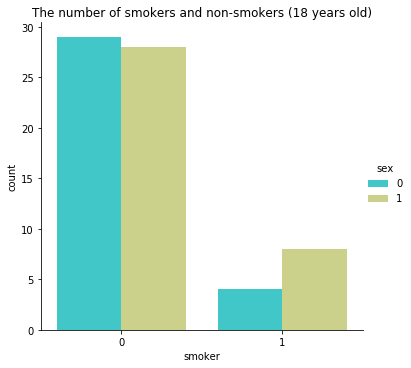

In [47]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")

Oh. I was hoping the result would be different.
18 years old - a very young age. Does smoking affect the cost of treatment at this age?


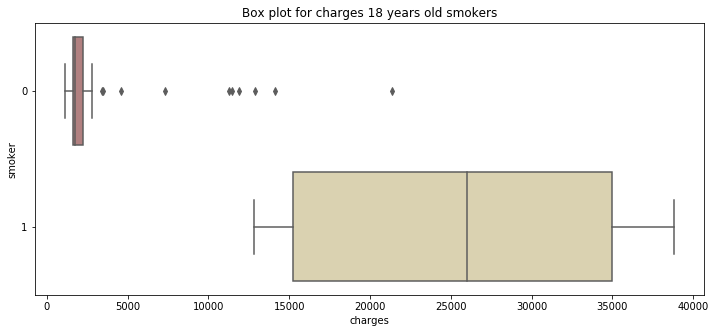

In [48]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

Oh. As we can see, even at the age of 18 smokers spend much more on treatment than non-smokers. Among non-smokers we are seeing some " tails." I can assume that this is due to serious diseases or accidents.
Now let's see how the cost of treatment depends on the age of smokers and non-smokers patients.

Text(0.5, 1, 'Distribution of charges and age for non-smokers')

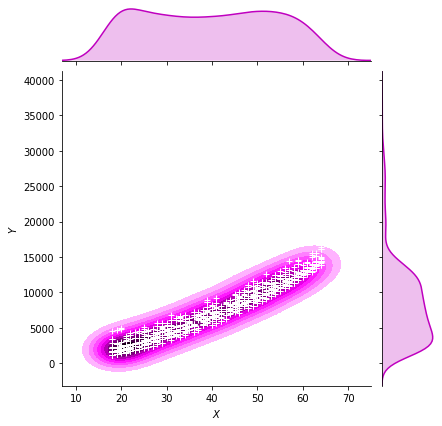

In [49]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

MW: What a great way to visualise joint density.

Text(0.5, 1, 'Distribution of charges and age for smokers')

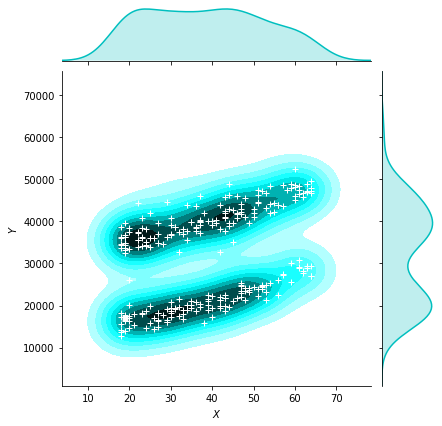

In [50]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

In [51]:
#non - smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 0)].age,y=data[(data.smoker == 0)].charges, size=7, line_color="navy", fill_color="pink", fill_alpha=0.9)

show(p)

In [52]:
#smokers
p = figure(plot_width=500, plot_height=450)
p.circle(x=data[(data.smoker == 1)].age,y=data[(data.smoker == 1)].charges, size=7, line_color="navy", fill_color="red", fill_alpha=0.9)
show(p)

Text(0.5, 1, 'Smokers and non-smokers')

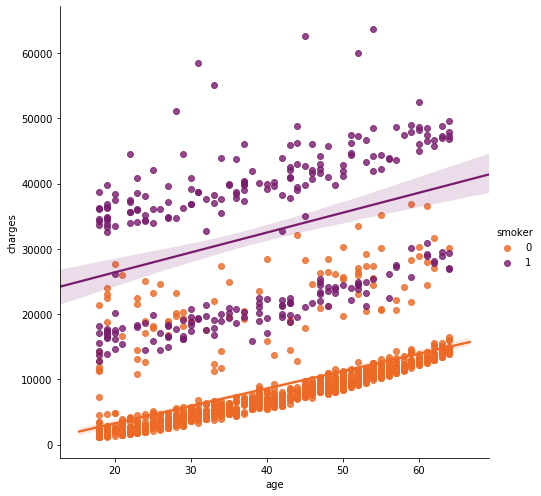

In [53]:

sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

In non-smokers, the cost of treatment increases with age. That makes sense. So take care of your health, friends!  In smoking people, we do not see such dependence.
I think that it is not only in smoking but also in the peculiarities of the dataset. Such a strong effect of Smoking on the cost of treatment would be more logical to judge having a set of data with a large number of records and signs.
But we work with what we have!
Let's pay attention to bmi. I am surprised that this figure but affects the cost of treatment in patients. Or are we on a diet for nothing?


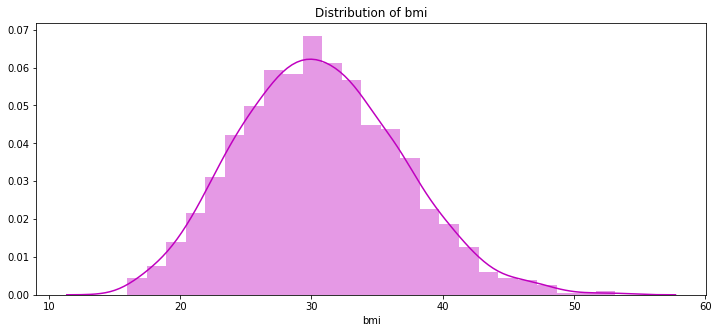

In [54]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

There's something insanely beautiful about this distribution, isn't there?  
The average BMI in patients is 30. I think I should go to the great Google with a question about this indicator. 
![![image.png](attachment:image.png)](http://1j4g1pasf991x0osxuqz6d10.wpengine.netdna-cdn.com/wp-content/uploads/2017/03/BMI-CHART-1024x791.png)
With a value equal to 30 starts obesity.  I also calculated my BMI and now I can safely eat a sandwich. Let's start to explore!
First, let's look at the distribution of costs in patients with BMI greater than 30 and less than 30.


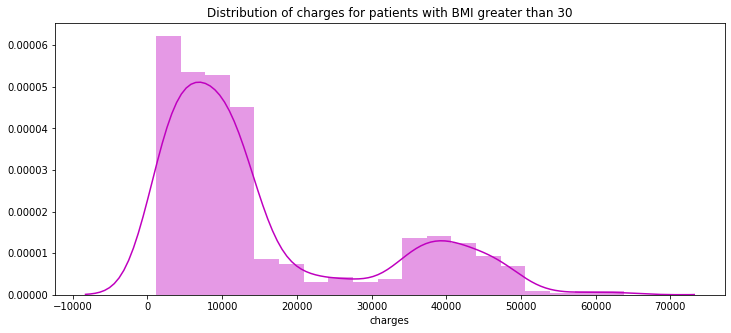

In [55]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

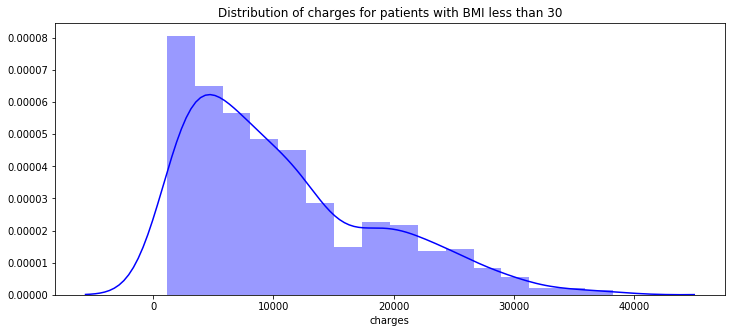

In [56]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

Patients with BMI above 30 spend more on treatment!

Text(0.5, 1, 'Distribution of bmi and charges')

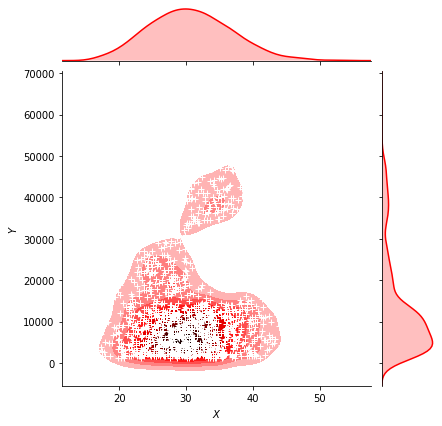

In [57]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')


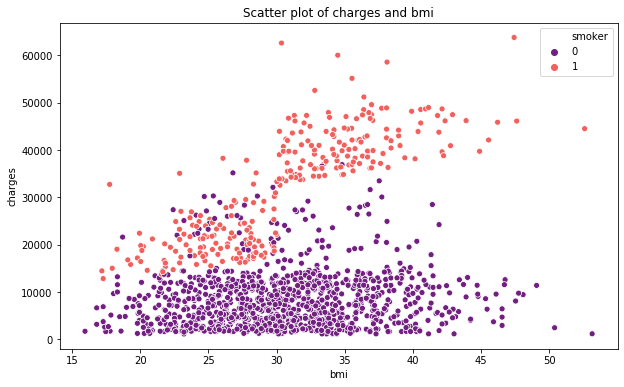

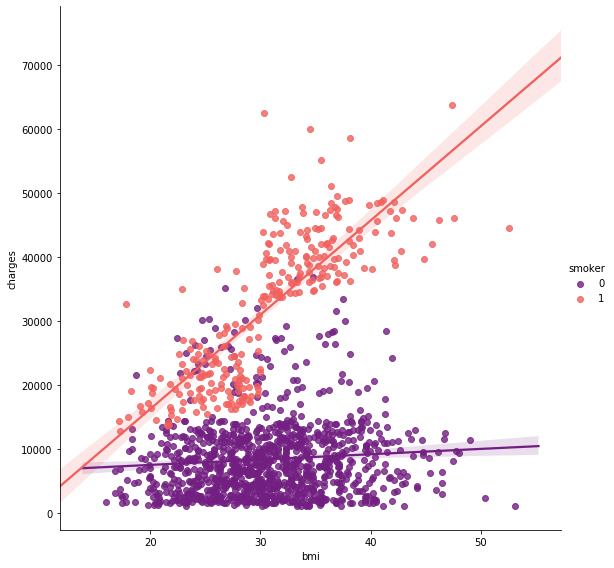

In [58]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

MW: So BMI is much more damaging in smokers than non-smokers. That's actually great news for the overweight. Don't smoke and you may be ok.

Let's pay attention to children. First, let's see how many children our patients have.


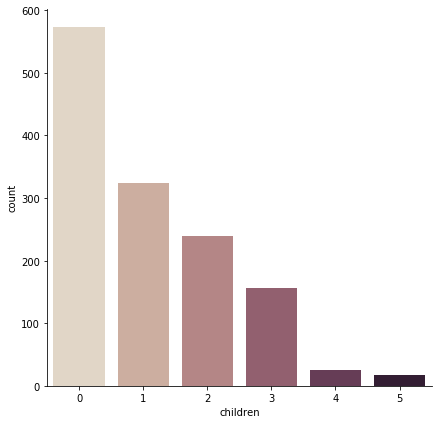

In [59]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

Most patients do not have children. Perfectly that some have 5 children! Children are happiness:)
I wonder if people who have children smoke.

Text(0.5, 1, 'Smokers and non-smokers who have childrens')

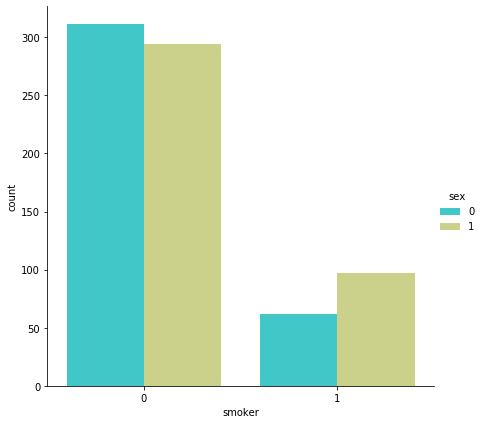

In [60]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

Oh oh oh.....


I have a few more ideas for exploring this dataset. I will soon implement them. And now we are going to predict the cost of treatment.
Let's start with the usual linear regression.

MW: Let's look at the relationship between smoking and age.

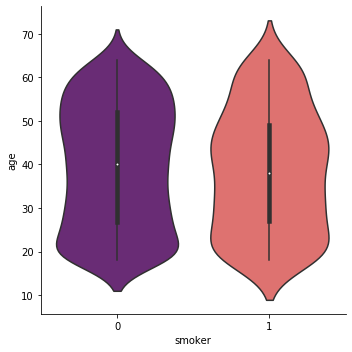

In [66]:
sns.catplot(x="smoker", y="age",
            kind="violin", data=data, palette = 'magma')

I find this quite confusing because, intuitively, the two violins should complement to ~1 horizontally. (i.e for every smoker there's 1 less non-smoker for a large enough sample)
This may again signal that the data is simulated.

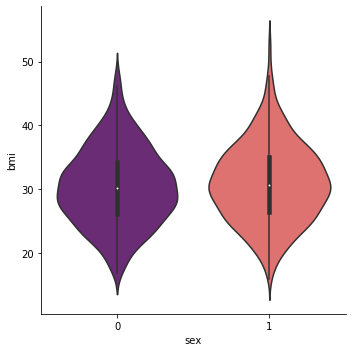

In [69]:
sns.catplot(x="sex", y="bmi",
            kind="violin", data=data, palette = 'magma')

Interestingly, it appears that there is more variability in the female bmi than the male. I wonder if this a population-level phenomenon.

In [71]:
data[data.sex==0].bmi.describe()

count    662.000000
mean      30.377749
std        6.046023
min       16.815000
25%       26.125000
50%       30.107500
75%       34.313750
max       48.070000
Name: bmi, dtype: float64

In [72]:
data[data.sex==1].bmi.describe()

count    676.000000
mean      30.943129
std        6.140435
min       15.960000
25%       26.410000
50%       30.687500
75%       34.992500
max       53.130000
Name: bmi, dtype: float64

That does seem to be borne out.

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [76]:
x = data.drop(['charges','region'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7958786376014413


D: Not bad for such a lazy implementation, even without data normalization:D
After all, the data will not always be so "good". So don't forget to pre-process the data.
I'll show you all this later when I try to implement my own linear regression. So don't be mad at me please :)
Now let's add polynomial signs. And look at the result.

MW: Strangely, by one-hot-encoding my region variables, my model actually did worse than D's. My score was 0.7958786376014413. Her score was 0.79627320. Let's see how it plays out from here.

In [77]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.8768054583276584


MW: Her score = 0.8849197344147235
My score = 0.87680545
Yet again, that one-hot-encoding has lowered my score. Why?

Already good. Our model predicts well the cost of treatment of patients. I think we could limit ourselves to creating two or three polynomial features, but the data set is so small, so we went the easy way.
And finally try RandomForestRegressor. I've never used this algorithm in regression analysis.

In [79]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3685168.754, MSE test data: 19671574.162
R2 train data: 0.974, R2 test data: 0.875


Her scores: MSE train data: 3729086.094, MSE test data: 19933823.142
R2 train data: 0.974, R2 test data: 0.873
        
My scores: MSE train data: 3685168.754, MSE test data: 19671574.162
R2 train data: 0.974, R2 test data: 0.875

Finally an instance where my model is superior.
    

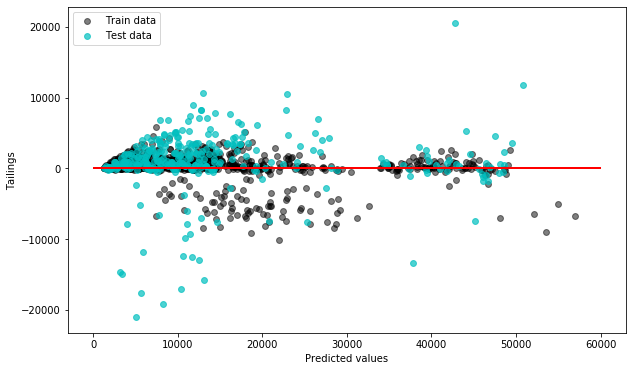

In [80]:
pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()

D: Good result. But we see a noticeable retraining of the algorithm on the training data.

MW: What could improve this implementation?

Scaling of the data? Choosing a different model? There probably aren't enough datapoints for a neural network but perhaps a k-nn might do it.

In [82]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = data.drop(['charges','region'], axis = 1)
y = data.charges

x = scaler.fit_transform(x)
print(x[:10])

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

[[-1.43876426 -1.0105187  -0.45332    -0.90861367  1.97058663 -0.56526686
  -0.56641788 -0.61132367  1.76548098]
 [-1.50996545  0.98959079  0.5096211  -0.07876719 -0.5074631  -0.56526686
  -0.56641788  1.63579466 -0.56641788]
 [-0.79795355  0.98959079  0.38330685  1.58092576 -0.5074631  -0.56526686
  -0.56641788  1.63579466 -0.56641788]
 [-0.4419476   0.98959079 -1.30553108 -0.90861367 -0.5074631  -0.56526686
   1.76548098 -0.61132367 -0.56641788]
 [-0.51314879  0.98959079 -0.29255641 -0.90861367 -0.5074631  -0.56526686
   1.76548098 -0.61132367 -0.56641788]
 [-0.58434998 -1.0105187  -0.80765608 -0.90861367 -0.5074631  -0.56526686
  -0.56641788  1.63579466 -0.56641788]
 [ 0.48366788 -1.0105187   0.45548642 -0.07876719 -0.5074631  -0.56526686
  -0.56641788  1.63579466 -0.56641788]
 [-0.15714284 -1.0105187  -0.47956712  1.58092576 -0.5074631  -0.56526686
   1.76548098 -0.61132367 -0.56641788]
 [-0.15714284  0.98959079 -0.13671415  0.75107928 -0.5074631   1.76907593
  -0.56641788 -0.61132

AttributeError: 'numpy.ndarray' object has no attribute 'summary'

In [87]:
lr = KNeighborsRegressor().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.8398279272726049


This isn't as good as linear regression. Let's weight the neighbours by distance.

In [88]:
lr = KNeighborsRegressor(weights='distance').fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.8429874490594458


Mild improvement. Let's see what happens when I change the number of neighbours. I really want to get up to 0.87680545 to beat the linear!

In [91]:
for n_neighbors in range(1,10):
    lr = KNeighborsRegressor(n_neighbors=n_neighbors,weights='distance').fit(x_train,y_train)

    y_train_pred = lr.predict(x_train)
    y_test_pred = lr.predict(x_test)

    print('with neighbours = ', n_neighbors, "R2 score = ", lr.score(x_test,y_test))

with neighbours =  1 R2 score =  0.7355025082889743
with neighbours =  2 R2 score =  0.811472219344184
with neighbours =  3 R2 score =  0.8292294799456483
with neighbours =  4 R2 score =  0.8381004357845444
with neighbours =  5 R2 score =  0.8429874490594458
with neighbours =  6 R2 score =  0.8450499502438249
with neighbours =  7 R2 score =  0.8449714489662045
with neighbours =  8 R2 score =  0.8455776253727539
with neighbours =  9 R2 score =  0.8409402995606697


It looks a bit hopeless pushing on with KNN regression. Just as my sister said: it's probably better to use linear for small datasets. Perhaps we'll try once more with a scaled quad and then a cubic.

In [92]:
scaler = StandardScaler()

x = data.drop(['charges','region'], axis = 1)
y = data.charges

X = scaler.fit_transform(x)



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_test,Y_test))

0.884129348260403


Nice, so scaling the data first does improve R2. So now, what about going cubic?

In [93]:
scaler = StandardScaler()

x = data.drop(['charges','region'], axis = 1)
y = data.charges

X = scaler.fit_transform(x)


for degree in range(5):
    quad = PolynomialFeatures (degree = degree)
    x_quad = quad.fit_transform(X)

    X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

    plr = LinearRegression().fit(X_train,Y_train)

    Y_train_pred = plr.predict(X_train)
    Y_test_pred = plr.predict(X_test)

    print('at degree = ', degree, 'the R2 is ', plr.score(X_test,Y_test))

at degree =  0 the R2 is  -0.00030161721339894143
at degree =  1 the R2 is  0.7955612065973884
at degree =  2 the R2 is  0.884129348260403
at degree =  3 the R2 is  0.8680871928103135
at degree =  4 the R2 is  0.7952308461821652


We reach our best validation R2 at degree polynomial 2. If I'm remembering Andrew Ng correctly, that's the point where bias and variance are balanced. As I increase the degrees of polynomial, the variance drops but the bias increases.